# Figure 1, part 2

Removed splicing events in genes with TPM < 1 in Notebook `1.1 Supplementary Figure 1`.

In [1]:
from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


import flotilla
sns.set(style='ticks', context='talk')

folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure1_expression'

study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering')

2015-10-15 12:26:14	Reading datapackage from /home/obotvinnik/flotilla_projects/singlecell_pnm_figure1_supplementary_post_splicing_filtering/datapackage.json
2015-10-15 12:26:14	Parsing datapackage to create a Study object
2015-10-15 12:27:08	Initializing Study
2015-10-15 12:27:08	Initializing Predictor configuration manager for Study
2015-10-15 12:27:08	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2015-10-15 12:27:08	Added ExtraTreesClassifier to default predictors
2015-10-15 12:27:08	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2015-10-15 12:27:08	Added ExtraTreesRegressor to default predictors
2015-10-15 12:27:08	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2015-10-15 12:27:08	Added GradientBoostingClassifier to default predictors
2015-10-15 12:27:08	Predictor GradientBoostingRegressor is of type <class 'skle

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:784: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


In [2]:
study.metadata._phenotype_to_color = {u'MN': u'#228a44',
                                     u'NPC': u'#73c476',
                                     u'iPSC': u'#c7e9c0'}

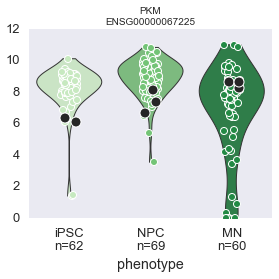

In [3]:
with sns.axes_style('dark'):
    study.plot_gene('PKM', sample_subset='~outlier')
    fig = plt.gcf()
    for ax in fig.axes:
        ax.set(ylim=(0, 12))

/home/obotvinnik/anaconda/lib/python2.7/site-packages/pandas/core/index.py:843: FutureWarning: slice indexers when using iloc should be integers and not floating point
  "and not floating point",FutureWarning)


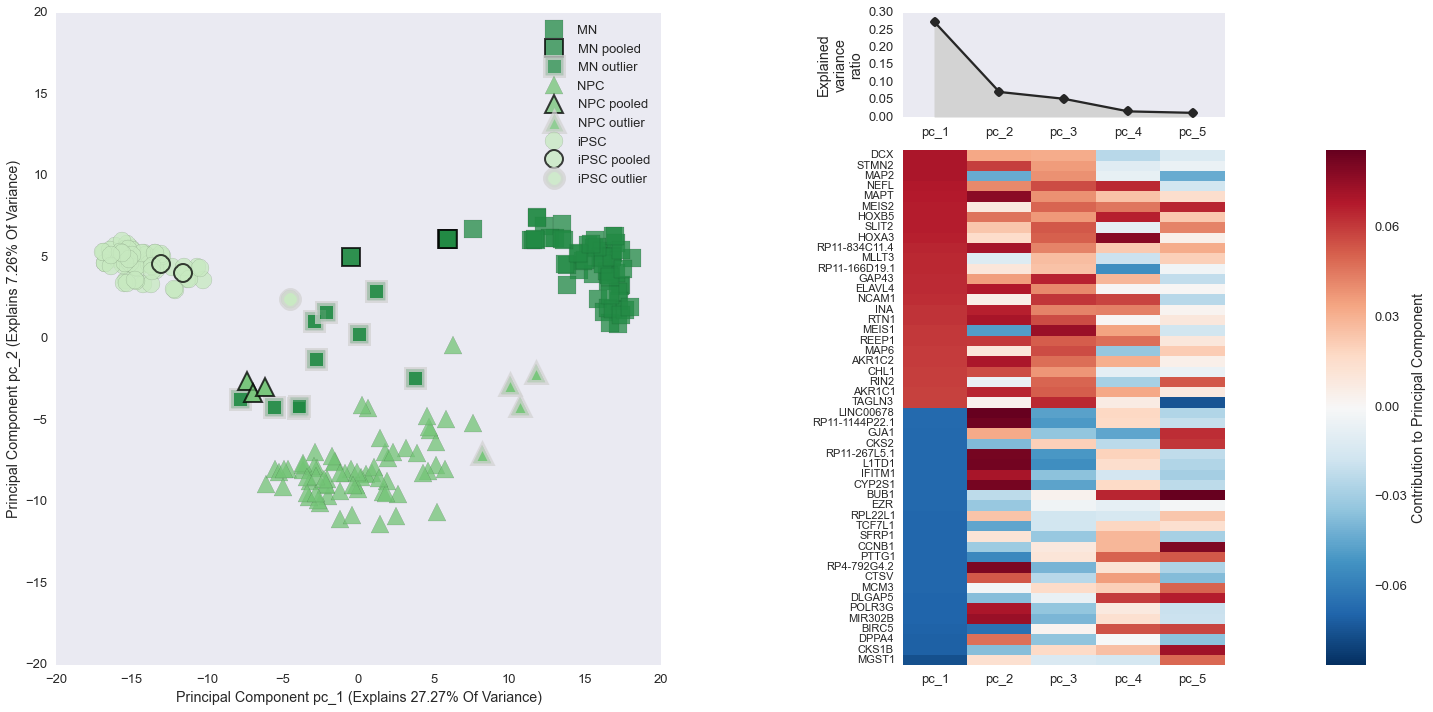

In [4]:
with sns.axes_style('dark'):
    viz = study.plot_pca(show_vectors=False, scale_by_variance=False, markersize=18)
    xmin, xmax, ymin, ymax = viz.ax_components.axis()
    vmin = min(xmin, ymin)
    vmax = max(xmax, ymax)
    viz.ax_components.set(xlim=(vmin, vmax), ylim=(vmin, vmax))
    viz.fig_reduced.savefig('{}/expression_pca.pdf'.format(folder))

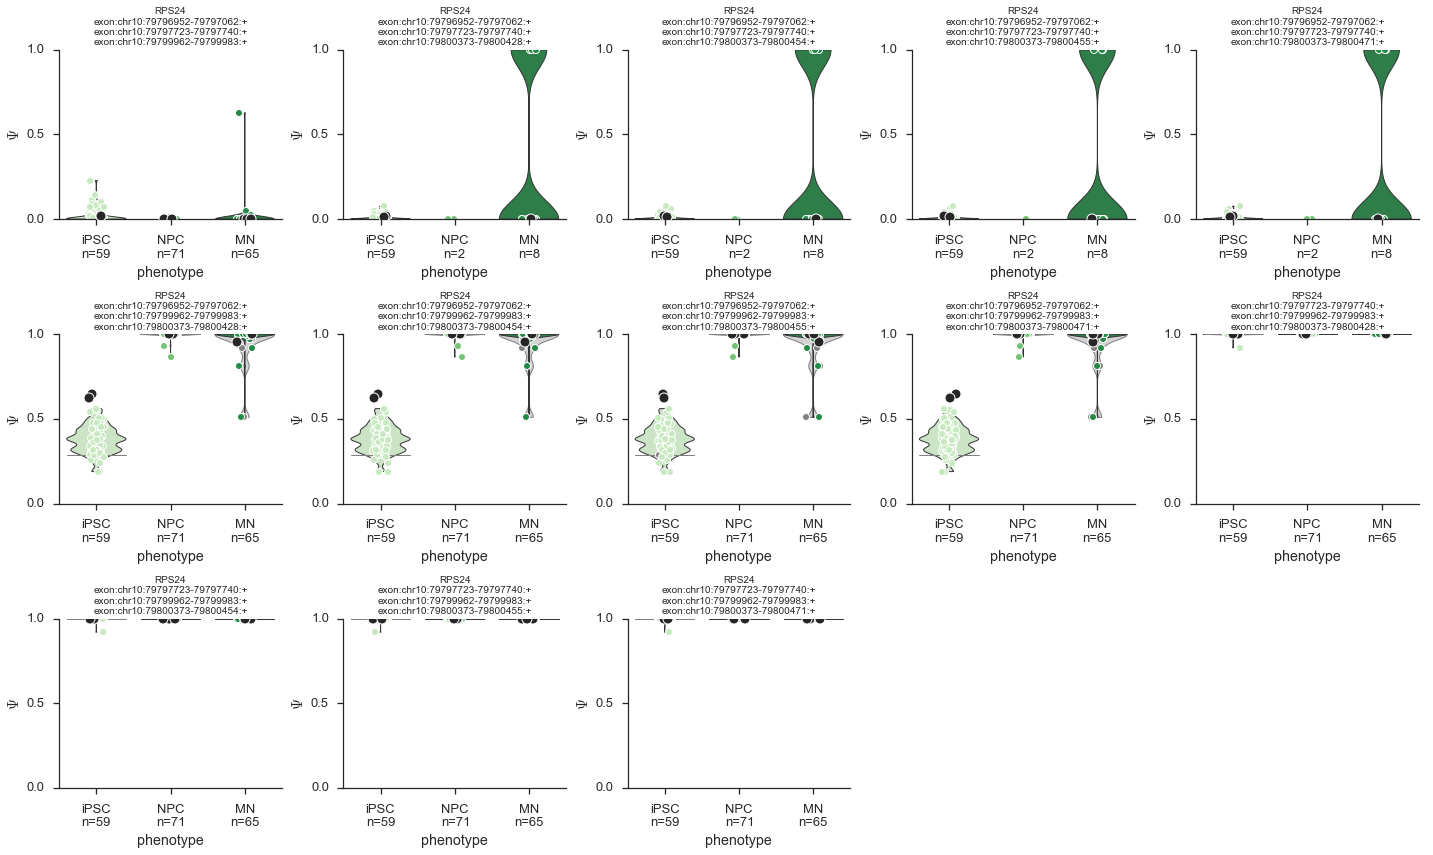

In [5]:
study.plot_event("RPS24")

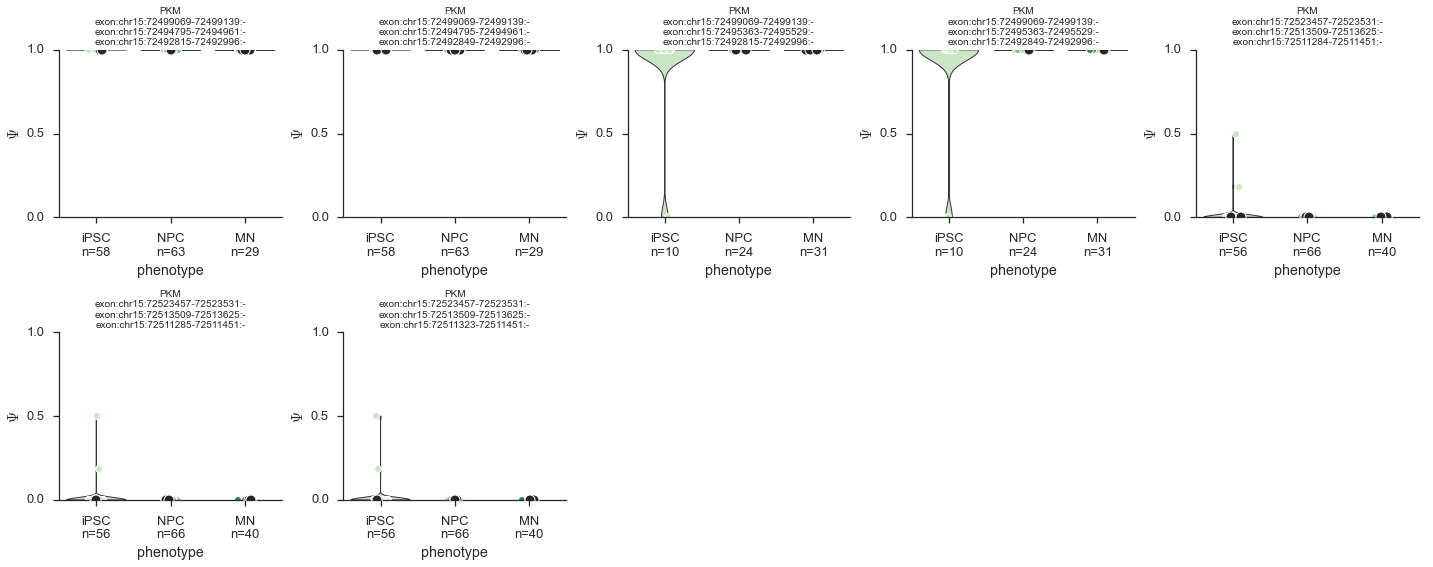

In [6]:
study.plot_event("PKM")

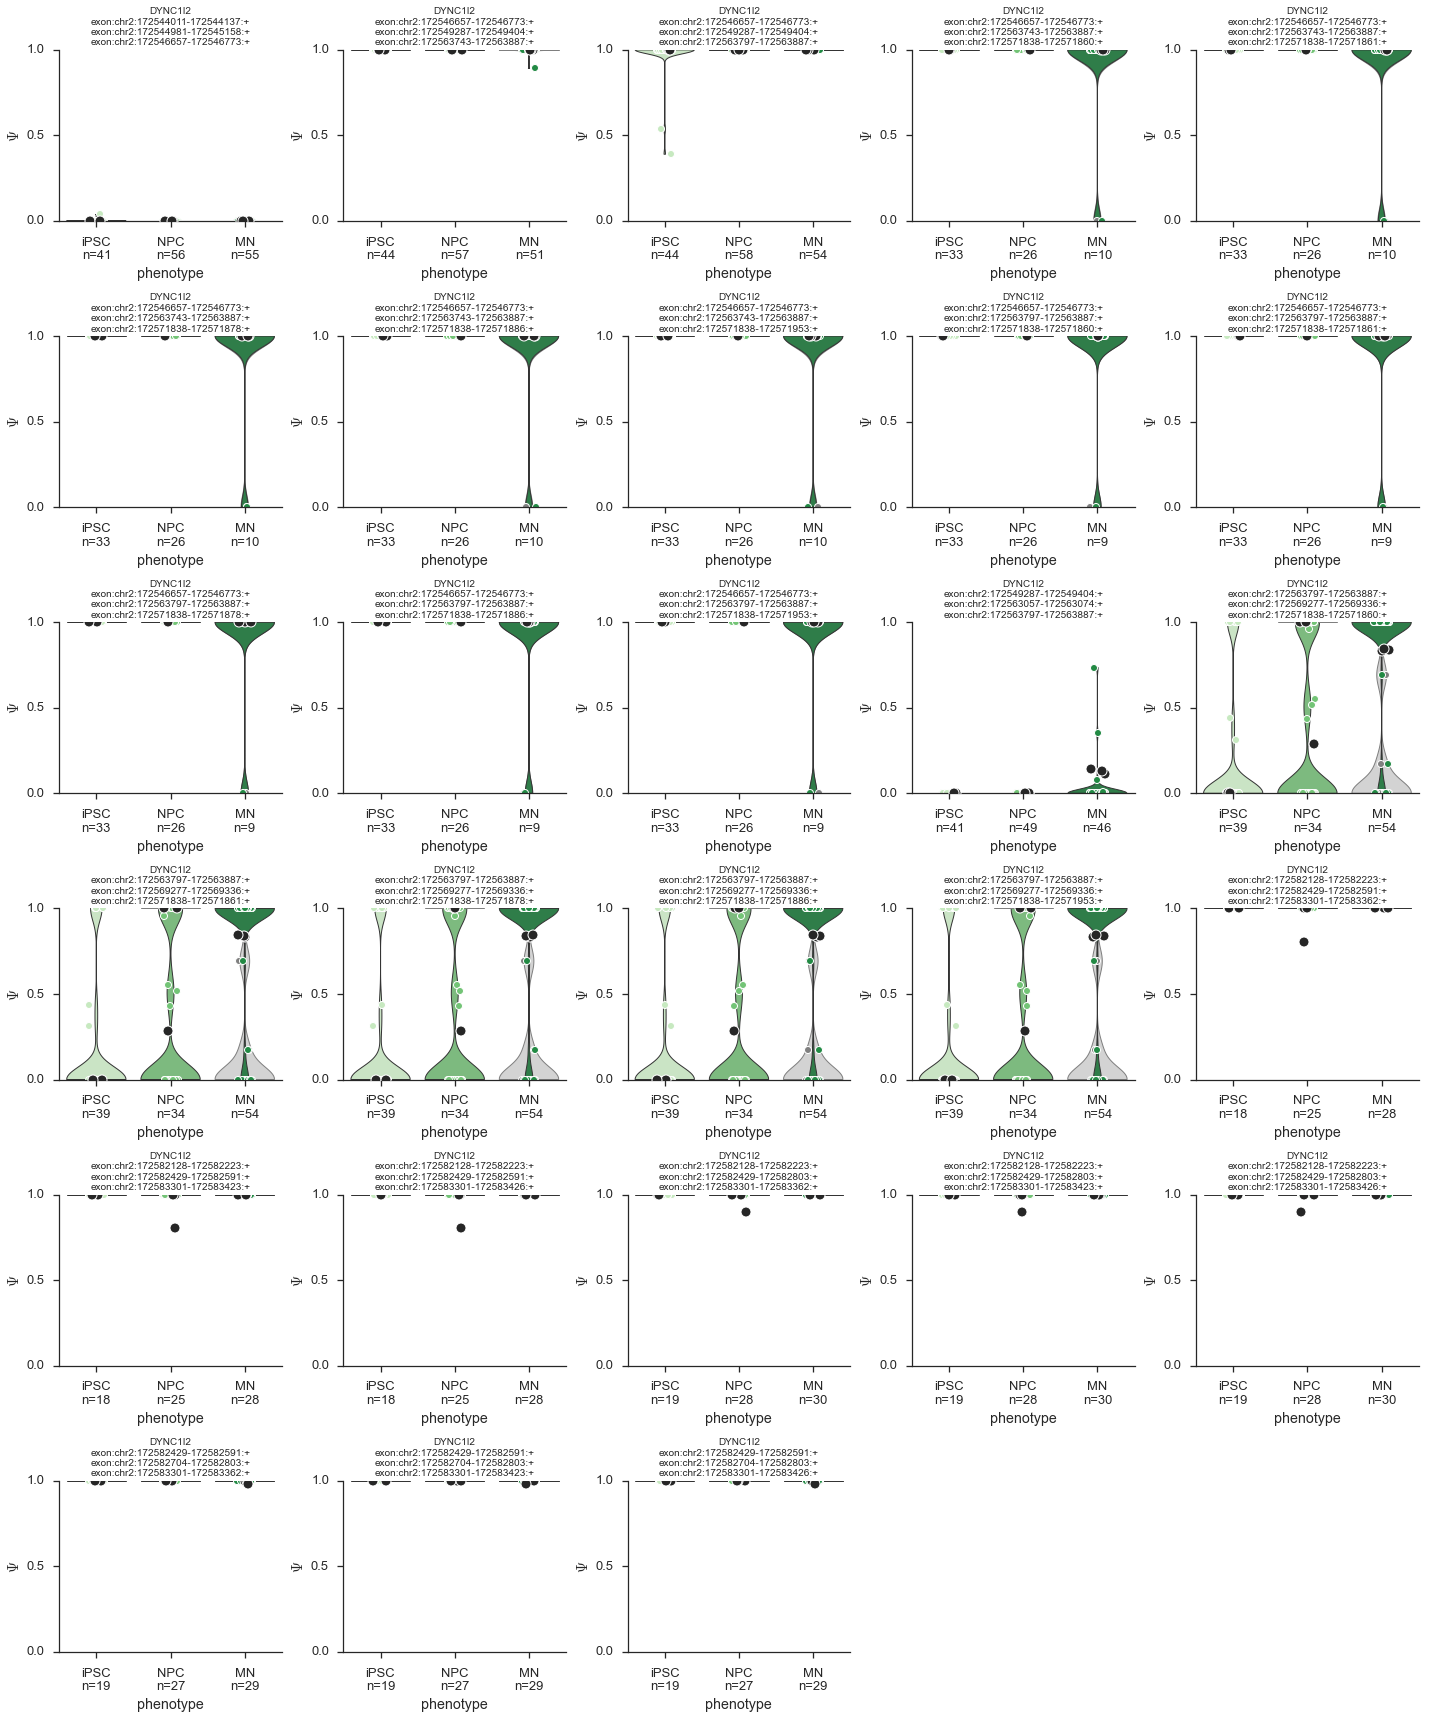

In [7]:
study.plot_event("DYNC1I2")

### Number of splicing events in non-differentially expressed genes

In [8]:
import collections
import itertools

event_per_genes = pd.Series(collections.Counter(itertools.chain(
            *study.splicing.feature_data.ensembl_id[non_de_event_names].map(
        lambda x: x.split(',')))))
# event_per_genes = s.groupby(s).size()
genes_without_splicing_events = pd.Index(non_de_genes).difference(event_per_genes.index)

print len(event_per_genes)

fig, ax = plt.subplots(figsize=(2.25, 2.25))
labels = 'Genes with alternative splice junctions', 'Genes without alternative slpice junctions'
sizes = [len(event_per_genes), len(genes_without_splicing_events)]
# colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
# explode = (0, 0.1, 0, 0) # only "explode" the 2nd slice (i.e. 'Hogs')

ax.pie(sizes, labels=None, colors=sns.color_palette('Paired'),
        autopct='%1.f%%', startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
ax.axis('equal')
ax.set(ylabel='With alt splicing', 
       xlabel='Without alt splicing', title='Constitutively\nexpressed genes')
fig.tight_layout()
fig.savefig('{}/constitutively_expressed_genes_percentage_genes_with_events.pdf'.format(folder))


NameError: name 'non_de_event_names' is not defined

In [ ]:
constitutively_spliced_genes = pd.Series(collections.Counter(itertools.chain(
            *study.splicing.feature_data.ensembl_id[study.supplemental.psi_constitutive.columns].dropna().map(
        lambda x: x.split(',')))))

constitutively_spliced_genes.head()

In [ ]:
alternatively_spliced_genes = pd.Series(collections.Counter(itertools.chain(
            *study.splicing.feature_data.ensembl_id[study.splicing.data.columns].dropna().map(
        lambda x: x.split(',')))))
# event_per_genes = s.groupby(s).size()
alternatively_spliced_genes.head()

In [ ]:
import matplotlib_venn
fig, ax = plt.subplots(figsize=(2, 2))
matplotlib_venn.venn2([alternatively_spliced_genes.index, constitutively_spliced_genes.index])

In [ ]:
study.expression.feature_data.loc[alternatively_spliced_genes.index]

In [ ]:
spliced = alternatively_spliced_genes.index.union(constitutively_spliced_genes.index)
len(spliced)

In [ ]:
spliced_expressed = study.expression.data.columns.intersection(spliced)


In [ ]:
spliced_genes = pd.DataFrame(index=['All genes', 'DE genes', 'non DE genes'], 
             columns=['No splice junctions', 'Only constitutive junctions', 
                    'Constitutive and alternative junctions'], dtype=int)
spliced_genes

In [ ]:
de_genes = pd.Index(de_genes)
non_de_genes = pd.Index(non_de_genes)

In [ ]:
spliced_genes.loc['All genes', 'No splice junctions'] = len(study.expression.data.columns) - len(spliced_expressed)
spliced_genes.loc['All genes', 'Only constitutive junctions'] = len(spliced_expressed.difference(alternatively_spliced_genes.index))
spliced_genes.loc['All genes', 'Constitutive and alternative junctions'] = len(spliced_expressed.intersection(alternatively_spliced_genes.index))

de_genes_spliced = de_genes.intersection(spliced)
spliced_genes.loc['DE genes', 'No splice junctions'] = len(de_genes) - len(de_genes_spliced)
spliced_genes.loc['DE genes', 'Only constitutive junctions'] = len(de_genes_spliced.difference(alternatively_spliced_genes.index))
spliced_genes.loc['DE genes', 'Constitutive and alternative junctions'] = len(de_genes_spliced.intersection(alternatively_spliced_genes.index))

non_de_genes_spliced = non_de_genes.intersection(spliced)
spliced_genes.loc['non DE genes', 'No splice junctions'] = len(non_de_genes) - len(non_de_genes_spliced)
spliced_genes.loc['non DE genes', 'Only constitutive junctions'] = len(non_de_genes_spliced.difference(alternatively_spliced_genes.index))
spliced_genes.loc['non DE genes', 'Constitutive and alternative junctions'] = len(non_de_genes.intersection(alternatively_spliced_genes.index))

spliced_genes

In [ ]:
study.plot_event("NRXN1")

In [ ]:
fig, ax = plt.subplots()
sns.distplot(alternatively_spliced_genes[de_genes].dropna(), label='DE genes')
sns.distplot(alternatively_spliced_genes[non_de_genes].dropna(), label='Constitutively expressed')
ax.legend();

In [ ]:
spliced_genes_percentages = spliced_genes.T
spliced_genes_percentages = spliced_genes_percentages/spliced_genes_percentages.sum()
spliced_genes_percentages

In [ ]:
ax = spliced_genes_percentages.T.plot(kind='bar')
ax.set_ylim(0, 0.15)

### Number of splicing events in all expressed genes

In [ ]:
import collections
import itertools

event_per_genes = pd.Series(collections.Counter(itertools.chain(
            *study.splicing.feature_data.ensembl_id[study.splicing.data.columns].map(
        lambda x: x.split(',')))))
# event_per_genes = s.groupby(s).size()
genes_without_splicing_events = study.expression.data.columns.difference(event_per_genes.index)

print len(event_per_genes)

fig, ax = plt.subplots(figsize=(2.25, 2.25))
labels = 'Genes with alternative splice junctions', 'Genes without alternative slpice junctions'
sizes = [len(event_per_genes), len(genes_without_splicing_events)]
# colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
# explode = (0, 0.1, 0, 0) # only "explode" the 2nd slice (i.e. 'Hogs')

ax.pie(sizes, labels=None, colors=sns.color_palette('Paired'),
        autopct='%1.f%%', startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
ax.axis('equal')
ax.set(ylabel='With alt splicing', 
       xlabel='Without alt splicing', title='Expressed genes')
fig.tight_layout()
fig.savefig('{}/percentage_genes_with_events.pdf'.format(folder))


In [ ]:
tf_events = event_per_genes[study.expression.feature_subsets['gerstberger2014_tf']].dropna()
rbp_events = event_per_genes[study.expression.feature_subsets['gerstberger2014_rbp_target_mrna']].dropna()
lincrna_events = event_per_genes[study.expression.feature_subsets['transcript_type: lincRNA']].dropna()

all_genes_events = event_per_genes.reset_index()
all_genes_events['Gene Type'] = 'All genes'

tf_events = tf_events.reset_index()
tf_events['Gene Type'] = 'TF'

rbp_events = rbp_events.reset_index()
rbp_events['Gene Type'] = 'RBP'

lincrna_events = lincrna_events.reset_index()
lincrna_events['Gene Type'] = 'lincRNA'

events_per_gene_type = pd.concat([all_genes_events, tf_events, rbp_events, lincrna_events])
events_per_gene_type = events_per_gene_type.rename(columns={0:'Alternative junctions per gene'})

fig, ax = plt.subplots(figsize=(3.5, 3))
sns.boxplot(x='Gene Type', y='Alternative junctions per gene', data=events_per_gene_type, linewidth=.5)
sns.despine()
ax.set_ylim(0, 100)

from scipy.stats import mannwhitneyu
import itertools

grouped = events_per_gene_type.groupby('Gene Type')
groups = grouped.groups.keys()

comparisons = itertools.combinations(groups, 2)

col = 'Alternative junctions per gene'

results = []
for group1, group2 in comparisons:
    test_statistic, p_value = mannwhitneyu(grouped.get_group(group1)[col], grouped.get_group(group2)[col])
    results.append([group1, group2, test_statistic, p_value])

columns = ['group1', 'group2', 'test_statistic', 'p_value']

mannwhitney_results = pd.DataFrame(results, columns=columns)
mannwhitney_results = mannwhitney_results.set_index(['group2', 'group1']).sort_index()
print mannwhitney_results.sort('p_value')
# ## Know that RBP-everything else is significant, so plot those
# others = ('All genes', 'TF', 'lincRNA')
# xticklabels = [x.get_text() for x in ax.get_xticklabels()]
# rbp_i = xticklabels.index('RBP')

# ymax = grouped[col].max().max()

# offset = 0
# yrange = ymax - grouped[col].min().min()
# offset_interval = yrange*0.1
# for i, other in enumerate(others):
#     offset = offset_interval*(i+1)
#     other_i = xticklabels.index(other)
#     ax.annotate("", xy=(rbp_i, ymax+offset), xycoords='data',
#                xytext=(other_i, ymax+offset), textcoords='data',
#                arrowprops=dict(arrowstyle="-", ec='#444444',
#                                connectionstyle="bar,fraction=0.08"))
#     middle = abs((rbp_i + other_i)/2.)
#     ax.text(middle, ymax + offset, '***',
#            horizontalalignment='center',
#            verticalalignment='center', fontsize=16)
# ax.set(xlabel='*** $p<10^{-10}$')
fig.tight_layout()
fig.savefig('{}/splicing_events_per_gene.pdf'.format(folder))

## Save only splicing events in constitutively expressed genes, with 20+ cells in at least one celltype

In [ ]:
study.splicing.data.shape

In [ ]:
singles_no_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)
len(singles_no_outliers)

In [ ]:
splicing_singles = study.splicing.data.loc[singles_no_outliers]
splicing_singles_count = splicing_singles.groupby(study.sample_id_to_phenotype).count()
twenty_per_celltype = (splicing_singles_count >= 20).any(axis=0)
splicing20 = study.splicing.data[twenty_per_celltype[twenty_per_celltype].index]
print splicing20.shape

In [ ]:
for phenotype, data in splicing20.groupby(study.sample_id_to_phenotype):

    flotilla.visualize.splicing.lavalamp(data, color=study.phenotype_to_color[phenotype], title=phenotype)

    fig = plt.gcf()
    fig.tight_layout()
#     fig.savefig('{}/lavalamp_{}.png'.format(folder, phenotype))

### Remove junctions that were spuriously included or excluded in only one cell

There are far more "excluded" junctions than included, due to the fact that if a 5'-3' junction was observed in only one cell, and a juction sharing a 5' or 3' end was observed in other cells, then all those other cells will get a $\Psi$ score of 0, thus inflating the number of "excluded" events since so many junctions are private to one cell.

A junction is only counted as alternative if we observed it as not excluded $\left(\Psi > 0.01\right)$ in at least 1 cells of any celltype. Otherwise, it was probably spuriously included in that one cell, and makes for a difficult comparison.

In [ ]:
not_excluded_counts = splicing20.groupby(study.sample_id_to_phenotype).apply(lambda x: (x > 0.01).sum())
not_excluded_twenty_per_celltype = (not_excluded_counts > 1).any()
not_excluded_twenty_per_celltype_events = not_excluded_twenty_per_celltype[not_excluded_twenty_per_celltype].index
splicing20 = splicing20[not_excluded_twenty_per_celltype_events]
print splicing20.shape

In [ ]:
for phenotype, data in splicing20.groupby(study.sample_id_to_phenotype):

    flotilla.visualize.splicing.lavalamp(data, color=study.phenotype_to_color[phenotype], title=phenotype)

    fig = plt.gcf()
    fig.tight_layout()
#     fig.savefig('{}/lavalamp_{}.png'.format(folder, phenotype))

A junction is only counted as alternative if we observed it as not included in more than 1 cell of any celltype

In [ ]:
# not_included_counts = splicing20.groupby(study.sample_id_to_phenotype).apply(lambda x: (x < 0.9).sum())
# not_included_twenty_per_celltype = (not_included_counts > 1).any()
# not_included_twenty_per_celltype_events = not_included_twenty_per_celltype[not_included_twenty_per_celltype].index
# splicing20 = splicing20[not_included_twenty_per_celltype_events]
# print splicing20.shape

In [ ]:
for phenotype, data in splicing20.groupby(study.sample_id_to_phenotype):

    flotilla.visualize.splicing.lavalamp(data, color=study.phenotype_to_color[phenotype], title=phenotype)

    fig = plt.gcf()
    fig.tight_layout()
#     fig.savefig('{}/lavalamp_{}.png'.format(folder, phenotype))

### Remove UBC events for now because we know they're a result of multimapped reads onlh

A junction is only counted as "constitutive" if it was observed as exactly included $\left(\Psi = 1\right)$ in 20 or more cells in each celltype.

In [ ]:
constitutive_singles = study.supplemental.psi_constitutive.loc[singles_no_outliers]
constitutive_singles_count = constitutive_singles.groupby(study.sample_id_to_phenotype).count()
constitutive_twenty_per_celltype = (constitutive_singles_count >= 20).all(axis=0)
constitutive_singles20 = constitutive_singles[constitutive_twenty_per_celltype[constitutive_twenty_per_celltype].index]
print constitutive_singles20.shape

In [ ]:
study.supplemental.psi_constitutive = constitutive_singles20

##### Sanity check

Make sure constitutive and alternative events don't overlap

In [ ]:
constitutive_singles20.columns.intersection(splicing20)

Assign to study object so they're saved together

In [ ]:
study.splicing.data_original = splicing20

In [ ]:
study.splicing.feature_data.shape

### Reduce the size of splicing feature data to speed up save/load times

In [ ]:
study.splicing.feature_data = study.splicing.feature_data.loc[constitutive_singles20.columns.union(splicing20.columns)]
print study.splicing.feature_data.shape

### Save the study!

In [ ]:
study.save('singlecell_pnm_figure1_20cells_per_celltype_per_event')